### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Let's take a look at the data

In [2]:
data = pd.read_csv('News.csv', index_col = 0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44919 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44919 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


### We needn't this columns

In [4]:
data = data.drop(["title","subject","date"], axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44919 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44919 non-null  object
 1   class   44919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 877.3+ KB


In [6]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [7]:
data.duplicated().sum()

6261

In [8]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


### Let's shuffle data

In [10]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True) 
data = data[0:100]

C:\Users\User\AppData\Local\Temp\ipykernel_2588\1091289651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = 'class', order = data['class'].value_counts().index, palette = ["red","blue"], alpha = 0.9)


<AxesSubplot:xlabel='class', ylabel='count'>

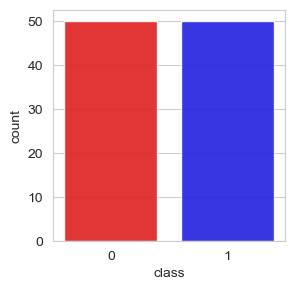

In [11]:
plt.figure(figsize=(3,3))
sns.set_style("whitegrid")
sns.countplot(data=data, x = 'class', order = data['class'].value_counts().index, palette = ["red","blue"], alpha = 0.9) 

### Pre-processing of news

In [12]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Preprocessing the text

In [13]:
def preprocess_text(text_data): 
    preprocessed_text = []       
    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english'))) 
    return preprocessed_text

In [14]:
preprocessed_review = preprocess_text(data['text'].values) 
data['text'] = preprocessed_review
data.head()

100%|██████████| 100/100 [00:34<00:00,  2.88it/s]


,text,class
0,in day filled breaking news stories one going ...,0
1,kabul reuters suicide bombers attacked two mos...,1
2,moscow reuters a russian air strike killed 49 ...,1
3,washington reuters us supreme court nominee ne...,1
4,democrats staging sitin floor congress go hung...,0


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

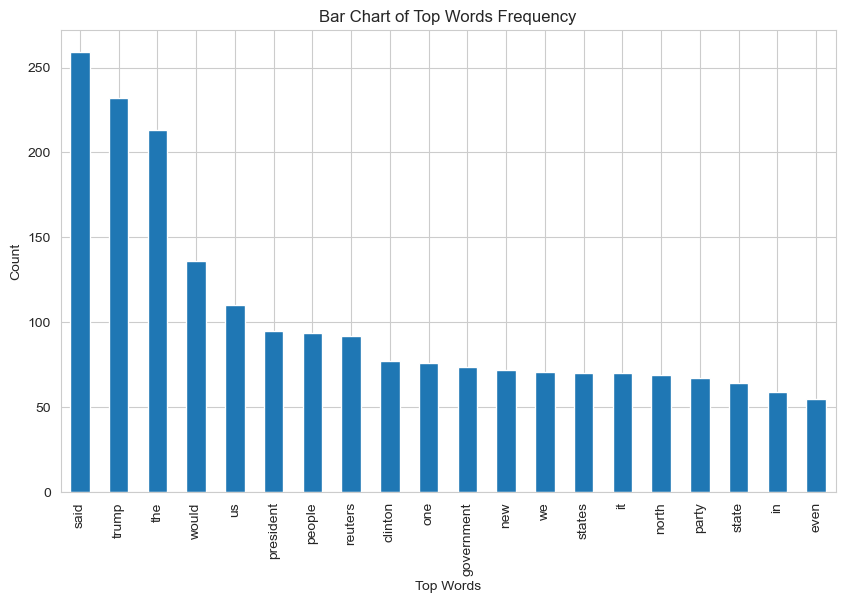

In [42]:
from sklearn.feature_extraction.text import CountVectorizer 
  
  
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 
  
  
common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency") 

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
  
x_train, x_test, y_train, y_test = train_test_split(data['text'],  
                                                    data['class'],  
                                                    test_size=0.25)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression 
  
model = LogisticRegression() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

1.0
0.92


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

1.0
1.0


### Confusion Matrix

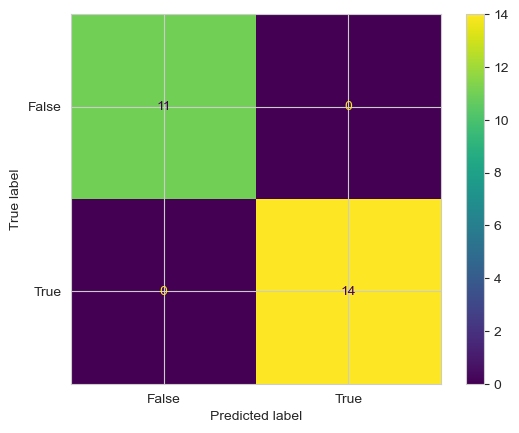

In [47]:
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=[False, True]) 
  
cm_display.plot() 
plt.show() 